# 13_mpg 데이터 실습

R 패키지에 포함되어 있는 예제 데이터로 1998년, 2004년, 2008년도에 미국에서 생산되는 자동차 제조회사별로 자동차의 연비, 구동방식 등을 조사한 데이터.

## #01. 패키지 및 샘플 데이터 준비

### 1) 패키지 가져오기

In [45]:
from pandas import DataFrame
from pandas import ExcelFile
from matplotlib import pyplot
from pandas import merge   # 열 단위 병합기능을 제공하는 함수
import numpy

### 2) 예제 데이터 가져오기

In [4]:
xlsx = ExcelFile("http://itpaper.co.kr/demo/py/mpg.xlsx")
mpg_df = xlsx.parse(xlsx.sheet_names[0])
mpg_df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


### 3) 데이터 살펴보기

####  데이터 프레임의 각 컬럼이 갖는 의미

| 컬럼이름      |  설명  |
|--------------|--------|
| manufacturer | 제조회사 |
| model | 자동차 모델명 |
| displ | 배기량 |
| year | 생산년도 |
| cyl | 실린더 갯수 |
| trans | 변속기 종류 |
| drv | 구동방식 |
| cty | 도시연비 |
| hwy | 고속도로 연비 |
| fl | 연료 종류 |
| class | 자동차종류 |

#### 연료 종류(fl) 컬럼에서 사용되는 코드값
| 코드 | 설명 |
|------|------|
| c | CNG (2.35) - 가스 |
| d | diesel (2.38) - 디젤 |
| e | ethanol E85 (2.11) - 에탄올 혼합연료 |
| p | premium (2.76) - 고급 휘발유 |
| r | regular (2.22) - 보통 휘발유 |

## #02. 기술 통계

### 1) 데이터 내용 확인하기

#### mpg 데이터의 크기 확인

In [5]:
행,열 = mpg_df.shape
print("행의 크기 = ", 행)
print("열의 크기 = ", 열)

행의 크기 =  234
열의 크기 =  12


#### 데이터의 일부 확인하기

##### 상위 5건 확인

In [5]:
mpg_df.head(5)

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


##### 하위 5건 확인

In [6]:
mpg_df.tail(5)

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize
233,234,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


### 2) 데이터 요약정보를 통해 기술통계값 확인하기

In [7]:
mpg_df.describe()

,Unnamed: 0,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,117.500000,3.471795,2003.500000,5.888889,16.858974,23.440171
std,67.694165,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.000000,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,59.250000,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,117.500000,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,175.750000,4.600000,2008.000000,8.000000,19.000000,27.000000
max,234.000000,7.000000,2008.000000,8.000000,35.000000,44.000000


#### 확인결과

##### 양적 자료

요약정보에 집계가 되는 컬럼으로서 관측된 값이 수치 형태의 속성을 가지는 자료.

사분위수와 상자그림으로 데이터 분포를 확인해야 하는 값들이다.

- 범위형(interval) 자료 : 화씨, 섭씨 와 같이 수치 간에 차이가 의미를 가진느 자료.
- 비율(ratio) 자료 : 무게와 같이 수치의 차이 뿐만 아니라 비율 또한 의미르 가지는 자료

> 배기량, 생산년도, 실리더 개수, 도시연비, 고속도로 연비

(이 중에서 생산년도와 실린더 개수는 데이터 값의 종류가 매우 적으므로 반드시 확인할 필요는 없다.)

##### 질적자료

범주 또는 순서 형태의 속성을 가지는 자료로서 도수 분포표와 히스토그램으로 데이터 분포를 확인 해야 한느 값들이다.

- 범주형 (명목, nominal) 자료 : 사람의 피부색, 성별
- 순서(서수, ordinal) 자료 : 제품의 품질, 등급, 순위 

> 제조회사, 모델명, 변속기 종류, 구동방식, 연료 종류, 자동차 종류


### 3) 양적 자료의 데이터 분포 확인

#### 상자그림을 통한 데이터 분포 확인하기

##### 그래프 기본 설정

In [6]:
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] =16
pyplot.rcParams["figure.figsize"] = (20,10)

###### 상자그림 확인

배기량, 생산년도, 실린더 개수, 도시연비, 고속도로 연비

> 이 데이터 셋에서 생산년도는 반드시 확인 해야할 항목은 아니므로 생략함

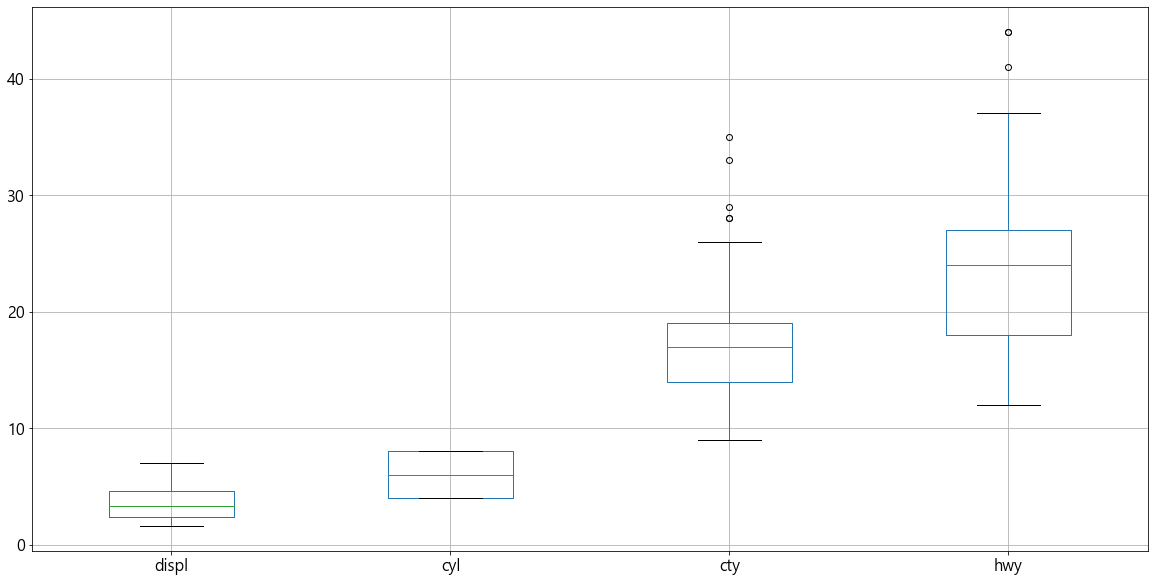

In [7]:
mpg_df.boxplot(['displ','cyl','cty','hwy'])
pyplot.show()

### 4) 질적 자료에 대한 데이터 빈도 확인

제조회사, 모델명, 변속기 종류, 구동방식, 연료종류, 자동차 종류

##### 데이터 빈도수 확인하기 

In [8]:
mpg_df['manufacturer'].value_counts()

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
subaru        14
hyundai       14
nissan        13
honda          9
jeep           8
pontiac        5
mercury        4
land rover     4
lincoln        3
Name: manufacturer, dtype: int64

In [10]:
mpg_df['model'].value_counts()

caravan 2wd               11
ram 1500 pickup 4wd       10
civic                      9
dakota pickup 4wd          9
mustang                    9
jetta                      9
grand cherokee 4wd         8
a4 quattro                 8
impreza awd                8
camry solara               7
durango 4wd                7
passat                     7
camry                      7
f150 pickup 4wd            7
sonata                     7
toyota tacoma 4wd          7
tiburon                    7
a4                         7
forester awd               6
altima                     6
new beetle                 6
explorer 4wd               6
4runner 4wd                6
corolla                    5
grand prix                 5
c1500 suburban 2wd         5
malibu                     5
corvette                   5
gti                        5
mountaineer 4wd            4
pathfinder 4wd             4
k1500 tahoe 4wd            4
range rover                4
expedition 2wd             3
a6 quattro    

In [11]:
mpg_df['trans'].value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [12]:
mpg_df['drv'].value_counts()

f    106
4    103
r     25
Name: drv, dtype: int64

In [13]:
mpg_df['fl'].value_counts()

r    168
p     52
e      8
d      5
c      1
Name: fl, dtype: int64

In [14]:
mpg_df['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

### 5) 문제

#### Q1) 자동차 배기량에 따라 고속도로 연비가 다른지 알아보려고 한다. displ(배기량)이 4 이하인 자동차와 5 이상인 자동차 중 어떤 자동차의 hwy(고속도로 연비)가 평균적으로 더 높은지 알아 보시오.        

##### 배기량이 4 이하인 자동차의 고속도록 연비 평균

In [15]:
mpg_a = mpg_df.query('displ <= 4')     # displ 4 이하 추출
mpg_a['hwy'].mean()

25.96319018404908

##### 배기량이 5 이상인 자동차의 고속도록 연비 평균

In [16]:
mpg_a = mpg_df.query('displ >= 5')     # displ 5 이상 추출
mpg_a['hwy'].mean()

18.07894736842105

#### Q2) 자동차 제조 회사에 따라 도시 연비가 다른지 알아보려고 한다. "audi"와 "toyota" 중 어느 manufacturer(자동차 제조 회사)의 cty(도시연비)가 평균적으로 더 높은지 알아보시오.

##### "audi"의 도시 연비 평균

In [17]:
mpg_audi = mpg_df.query('manufacturer == "audi"')     # 아우디 추출
mpg_audi['cty'].mean()                    # 아우디의 도시 연비 평균

17.61111111111111

##### "toyota"의 도시 연비 평균

In [18]:
mpg_toyota = mpg_df.query('manufacturer == "toyota"')     # 토요타 추출
mpg_toyota['cty'].mean()                    # 토용타의 도시 연비 평균

18.529411764705884

#### Q3) "chevrolet", "ford", "honda" 자동차의 고속도로 연비 평균을 알아보려고 한다. 이 회사들의 데이터를 추출한 후 hwy 전체 평균을 확인하시오

##### 방법1 - in연산 사용하기

In [24]:
target = ['chevrolet', 'ford', 'honda']
target_df = mpg_df.query('manufacturer in @target')
target_df['hwy'].mean()

22.50943396226415

##### 방법2 - or연산 사용하기

In [25]:
target_df = mpg_df.query('manufacturer == "chevrolet" or manufacturer == "ford" or manufacturer == "honda"')
target_df['hwy'].mean()

22.50943396226415

## #02. 데이터 전처리 문제

mpg 데이터의 fl 변수는 자동차에 사용되는 연료(fuel)를 의미한다. (각 연료 이름의 첫 글자만 저장.)
mpg 데이터에는 연료 종류를 나타낸 fl 변수는 있지만 연료 가격을 나타내는 변수는 없다.
다음은 가격정보를 이용해 mpg 데이터에  price_fl(연료가격) 변수를 추가하라.

| 코드 | 종류 | 가격 |
|------|------|------|
| c    | 가스  | 2.35 달러 |
| d    | 디젤  | 2.38 달러 |
| e    | 에탄올 혼합연료  | 2.11 달러 |
| p    | 고급 휘발유   |  2.76 달러 |
| r    | 보통 휘발유   |2.22 달러 |

추가한 결과에서  model, fl, price_fl 추출하여 출력하세요

### 1) mpg 에 연료 가격 변수 추가 

#### 연료 가격 정보 만들기 

In [28]:
연료가격df = DataFrame({"fl" : ["c","d","e","p","r"],  "price_fl" : [2.35, 2.38, 2.11, 2.76, 2.22]})

연료가격df

,fl,price_fl
0,c,2.35
1,d,2.38
2,e,2.11
3,p,2.76
4,r,2.22


In [29]:
병합df =  merge(mpg_df, 연료가격df, left_on='fl', right_on='fl')
병합df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,price_fl
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.76
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.76
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.76
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2.76
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,123,jeep,grand cherokee 4wd,3.0,2008,6,auto(l5),4,17,22,d,suv,2.38
230,213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,2.38
231,222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,2.38
232,223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,2.38


#### 추가한 결과에서 model, fl, price_fl 추출하여 출력

In [30]:
병합df.filter(['model', 'fl', 'price_fl'])

,model,fl,price_fl
0,a4,p,2.76
1,a4,p,2.76
2,a4,p,2.76
3,a4,p,2.76
4,a4,p,2.76
...,...,...,...
229,grand cherokee 4wd,d,2.38
230,jetta,d,2.38
231,new beetle,d,2.38
232,new beetle,d,2.38


## #04. 데이터 정제 문제

### 1) 결측치 정제
#### mpg 데이터에서 구동방식(drv)별 고속도록 연비(hwy) 평균 알아보기 .

> 문제 설정을 위해 아래와 같이 임의의 결측치를 생성하고 진행하세요.

In [31]:
mpg_df.loc[65,"hwy"] = None
mpg_df.loc[124,"hwy"] = None
mpg_df.loc[131,"hwy"] = None
mpg_df.loc[153,"hwy"] = None
mpg_df.loc[212,"hwy"] = None

#### Q1) 분석을 하기 전에 두 변수에 결측치가 있는지 확인해야 한다. 구동방식 변수와 고속도로 연비 변수에 결측치가 몇 개 있는지 알아보아라.

##### 구동 방식에 대한 결측치 확인

In [33]:
결측치합계 = mpg_df.filter(['drv','hwy']).isna().sum()
결측치합계

drv    0
hwy    5
dtype: int64

#### Q2) hwy  변수의 결측치를 제외하고, 어떤 구동 방식의 hwy 평균이 높은지 알아보아라.

##### 구동방식과 고속도로 연비 추출 후 결측치 제거

In [38]:
정제df = mpg_df.filter(['drv','hwy']).dropna()
정제df 

,drv,hwy
0,f,29.0
1,f,29.0
2,f,31.0
3,f,30.0
4,f,26.0
...,...,...
229,f,28.0
230,f,29.0
231,f,26.0
232,f,26.0


##### 구동방식별 평규

In [39]:
정제df.groupby('drv').mean()

,hwy
drv,
4,19.262626
f,28.009524
r,21.000000


### 3) 이상치 정제

#### mpg 데이터에서 구동방식별 고속도로 연비 평균과 도시 연비 평균을 극단치를 제외하고 확인하시오.

#### 각 연비별 이상치 확인

상자그림의 상태값을 함께 출력하여 극단치 경계값을 찾아야 한다

> 상자그림의 출력 결과 고속도록 연부의 경우 37보다 큰 경우, 도시연비의 경우 26 보다 큰 경우가 이상치인 것으로 확인된다.

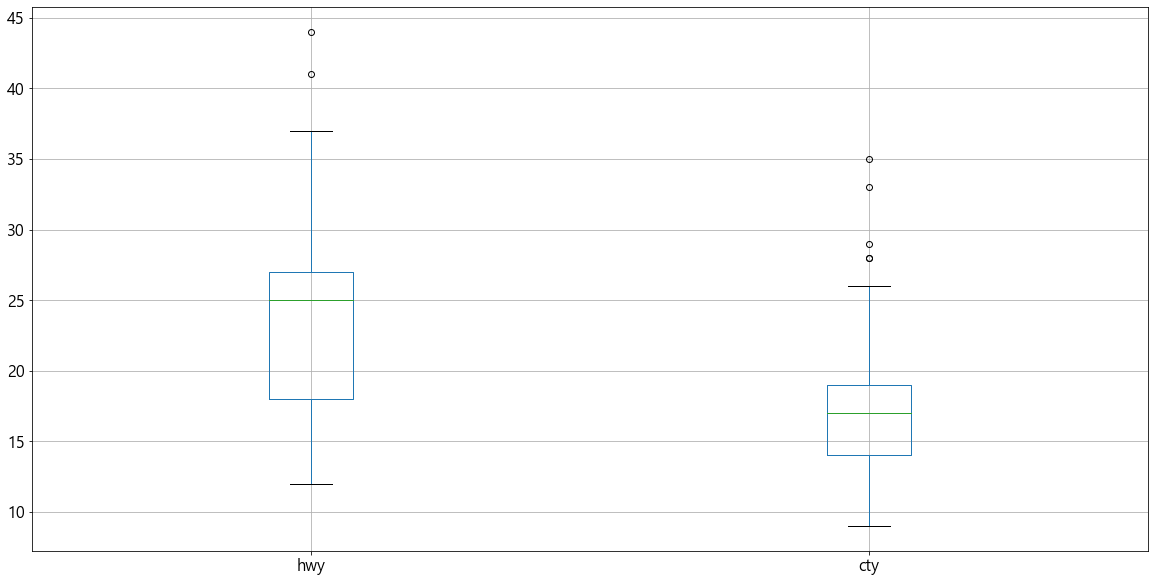

In [41]:
mydf = mpg_df.filter(['drv', 'hwy','cty'])
mydf.boxplot()
pyplot.show()

#### 이상치를 결측치로 변경하기 

##### a) 고속도로 연비의 이상치 데이터 추출하기 

In [43]:
이상치df1 = mpg_df.query('hwy>37')
이상치df1

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
221,222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44.0,d,subcompact
222,223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41.0,d,subcompact


##### b) 도시 연비의  이상치 데이터 추출

In [44]:
이상치df2 = mpg_df.query('cty>26')
이상치df2

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
99,100,honda,civic,1.6,1999,4,manual(m5),f,28,33.0,r,subcompact
196,197,toyota,corolla,1.8,2008,4,manual(m5),f,28,37.0,r,compact
212,213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,NaN,d,compact
221,222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44.0,d,subcompact
222,223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41.0,d,subcompact


##### c) 정제를 위해서 복사본 생성

In [46]:
이상치정제df = mpg_df.copy()
이상치정제df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29.0,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26.0,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26.0,p,midsize


##### d) 고속도록 연비에 대한 이상치를 결측치로 변경

In [47]:
for i in 이상치df1.index:
    이상치정제df.loc[i,'hwy'] = numpy.nan
    
이상치정제df    

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29.0,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26.0,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26.0,p,midsize


##### e) 도시 연비에 대한 이상치를 결측치로 변경

In [48]:
for i in 이상치df2.index:
    이상치정제df.loc[i,'cty'] = numpy.nan
    
이상치정제df 

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18.0,29.0,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21.0,29.0,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20.0,31.0,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21.0,30.0,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16.0,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19.0,28.0,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21.0,29.0,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16.0,26.0,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18.0,26.0,p,midsize


##### f) 결측치 확인

In [49]:
이상치정제df.filter(['drv','hwy']).isna().sum()

drv    0
hwy    7
dtype: int64

##### 결측치를 제거한 구동방식별 고속도로 연비 평균과 도시 연비 평균

In [51]:
구동방식별연비평균df = 이상치정제df.filter(['drv','hwy','cty']).dropna().groupby('drv').mean()
구동방식별연비평균df

,hwy,cty
drv,,
4,19.262626,14.424242
f,27.584158,19.445545
r,21.000000,14.080000


#### 데이터 시각화

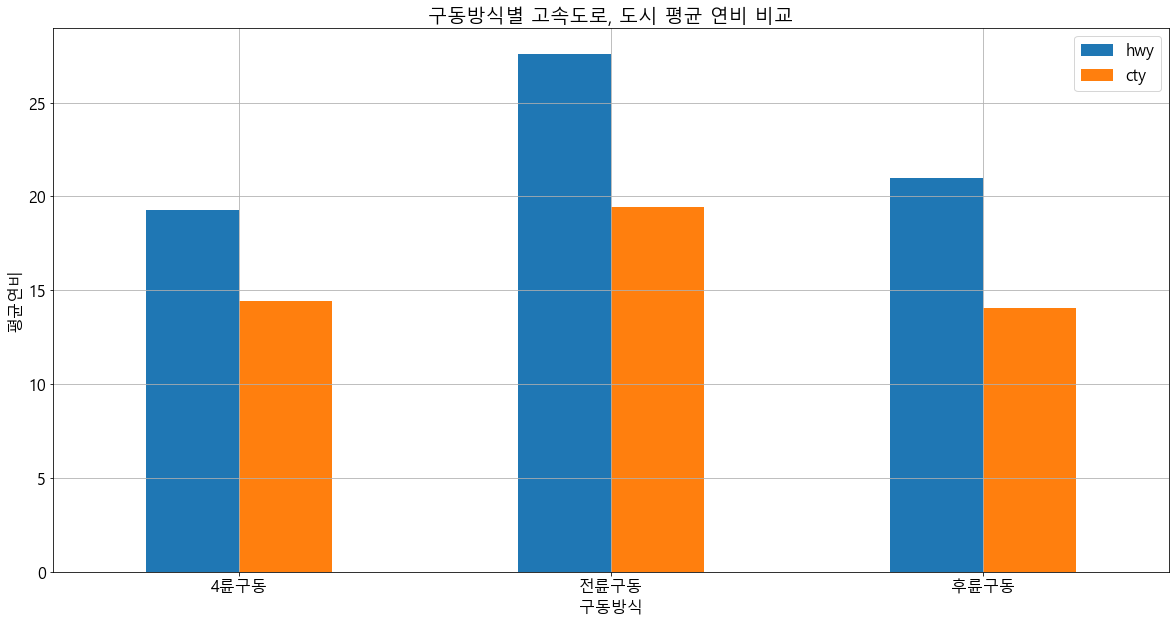

In [52]:
구동방식별연비평균df.plot.bar(rot=0)
pyplot.grid()
pyplot.xticks([0,1,2],['4륜구동', '전륜구동', '후륜구동'])
pyplot.title('구동방식별 고속도로, 도시 평균 연비 비교')
pyplot.ylabel('평균연비')
pyplot.xlabel('구동방식')
pyplot.show()

#### q2) 자동차 중에서 어떤 class(자동차 종류)가 가장 많은지 알아보려고 한다. 자동차 종류별 빈도를 표현한 막대 그래프를 표현하시오.

##### 값의 종류별 빈도수 검사 (.value_counts())

In [59]:
vcount = mpg_df['class'].value_counts()
vcount

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

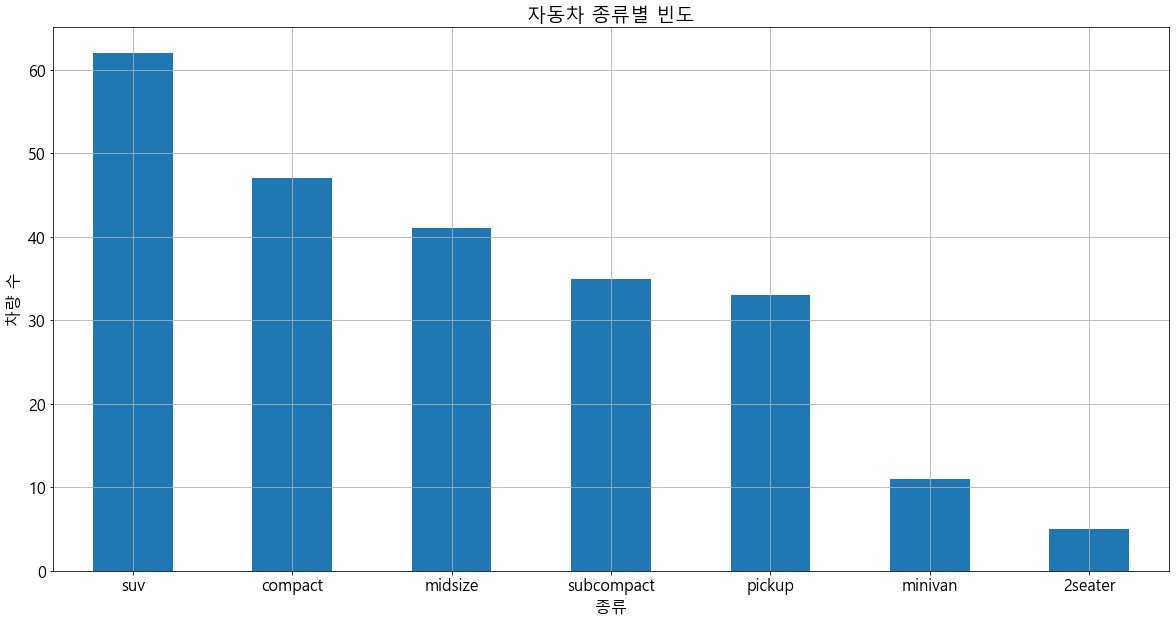

In [60]:
vcount.plot.bar(rot=0)
pyplot.grid()
pyplot.title('자동차 종류별 빈도')
pyplot.ylabel('차량 수')
pyplot.xlabel('종류')
pyplot.show()

#### Q3) 어떤 회사에서 생산한 "suv" 차종의 도시연비(cty)가 높은지 알아보려 한다. "suv" 차종을 대상으로 평균 cty가 가장 높은 회사 다섯곳을 막대 그래프로 표현하시오.


##### "suv" 차종에 대한 제조사별 도시연비 평균 구하기 

> 컬럼이름 `class` 가 python의 예약어이므로 역따옴표로 감싼 상태로 명시해햐 합니다.

In [61]:
제조사별suv연비평균df = mpg_df.query("`class` == 'suv'").filter(['manufacturer','cty']).groupby('manufacturer').mean()
제조사별suv연비평균df

,cty
manufacturer,
chevrolet,12.666667
dodge,11.857143
ford,12.888889
jeep,13.500000
land rover,11.500000
lincoln,11.333333
mercury,13.250000
nissan,13.750000
subaru,18.833333


##### cty 컬럼을 기준으로 역순 정렬

In [63]:
제조사별suv연비정렬df = 제조사별suv연비평균df.sort_values('cty',ascending=False)
제조사별suv연비정렬df

,cty
manufacturer,
subaru,18.833333
toyota,14.375000
nissan,13.750000
jeep,13.500000
mercury,13.250000
ford,12.888889
chevrolet,12.666667
dodge,11.857143
land rover,11.500000


##### 정렬결과에 대한 상위 5건 추출

In [65]:
연비top5df = 제조사별suv연비정렬df.head(5)
연비top5df

,cty
manufacturer,
subaru,18.833333
toyota,14.375000
nissan,13.750000
jeep,13.500000
mercury,13.250000


##### 시각화

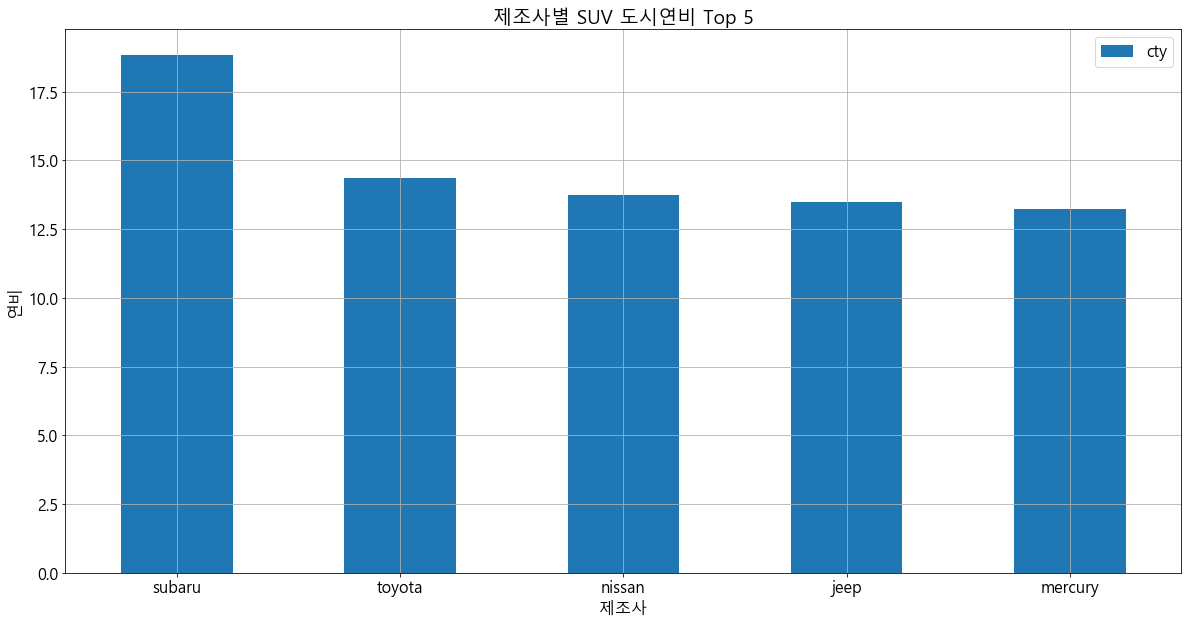

In [66]:
연비top5df.plot.bar(rot=0)
pyplot.grid()
pyplot.title('제조사별 SUV 도시연비 Top 5')
pyplot.ylabel('연비')
pyplot.xlabel('제조사')
pyplot.show()